In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [254]:
def get_results(map, algorithm, dir, stat, add=''):
    delim = ';'
    if algorithm == 'theta_star':
        delim = ','
    return pd.read_csv(f"{dir}/{algorithm}_{map}_result{add}.csv", sep=delim)[stat]

def get_normalized_results(map, algorithm, dir, stat):
    base = 'astar'
    if algorithm == 'polyanya':
        base = 'astar_cpp'
        base = 'astar'
    eps = 10 ** -9
    return get_results(map, algorithm, dir, stat) / (get_results(map, base, 'results', stat) + eps)

def get_pair_results(map, algorithm, dir, stat):
    base = 'astar'
    data = list(zip(get_results(map, base, 'results', 'expanded'), get_results(map, algorithm, dir, stat)))
    data.sort()
    data = list(zip(*data))
    return data
    

In [255]:
def draw_boxplot(stat, is_log_scale, is_normalized=False):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
    algorithms = ['anya', 'polyanya', 'theta_star', 'astar']
    maps = ['AR0500SR', 'maze512-2-5', 'Milan_1_1024', 'random512-20-0']
    for i in range(len(maps)):
        map = maps[i]
        col = i % 2
        row = i // 2
        data = []
        for j in range(len(algorithms)):
            algorithm = algorithms[j]
            alg_data = get_results(map, algorithm, 'results', stat)
            if is_normalized:
                alg_data = get_normalized_results(map, algorithm, 'results', stat)
            if is_log_scale:
                alg_data = np.log10(alg_data)
            data.append(alg_data)
        bplot = ax[row, col].boxplot(data, labels=algorithms)
        start_word = ''
        if is_normalized: 
            start_word = 'normalized ' 
        ax[row, col].set_title(f"{map} {start_word}{stat}")
    plt.show()
        

In [256]:
def draw_alternative_anya_boxplot(stat, is_log_scale):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
    algorithms = ['anya', 'anya no pruning']
    maps = ['AR0500SR', 'maze512-2-5', 'Milan_1_1024', 'random512-20-0']
    for i in range(len(maps)):
        map = maps[i]
        col = i % 2
        row = i // 2
        data = [get_results(map, 'anya', 'results', stat), get_results(map, 'anya', 'results/alternative_anya', stat, '_nopruning')]
        if is_log_scale:
            data[0] = np.log10(data[0])
            data[1] = np.log10(data[1])
        bplot = ax[row, col].boxplot(data, labels=algorithms)
        ax[row, col].set_title(f"{map} {stat}")
    plt.show()

In [257]:
def draw_alternative_polyanya_boxplot(stat, is_log_scale):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
    algorithms = ['polyanya m-cdt', 'polyanya cdt', 'polyanya rec']
    maps = ['AR0500SR', 'maze512-2-5', 'Milan_1_1024', 'random512-20-0']
    adds = ['', '_cdt', '_rect']
    dirs = ['results', 'results/alternative_polyanya', 'results/alternative_polyanya']
    for i in range(len(maps)):
        map = maps[i]
        col = i % 2
        row = i // 2
        data = []
        for j in range(len(algorithms)):
            algorithm = algorithms[j]
            alg_data = get_results(map, 'polyanya', dirs[j], stat, adds[j])
            if is_log_scale:
                alg_data = np.log10(alg_data)
            data.append(alg_data)
        bplot = ax[row, col].boxplot(data, labels=algorithms)
        start_word = ''
        ax[row, col].set_title(f"{map} {start_word}{stat}")
    plt.show()

In [258]:
def draw_line_plot(stat, is_log_scale):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
    algorithms = ['anya', 'polyanya', 'theta_star']
    maps = ['AR0500SR', 'maze512-2-5', 'Milan_1_1024', 'random512-20-0']
    for i in range(len(maps)):
        map = maps[i]
        col = i % 2
        row = i // 2
        for j in range(len(algorithms)):
            algorithm = algorithms[j]
            alg_data = get_pair_results(map, algorithm, 'results', stat)
            if is_log_scale:
                alg_data[1] = np.log10(alg_data[1])
            ax[row, col].plot(alg_data[0], alg_data[1], label=algorithm)
        ax[row, col].set_title(f"{map} {stat}")
        ax[row, col].legend()
    plt.show()

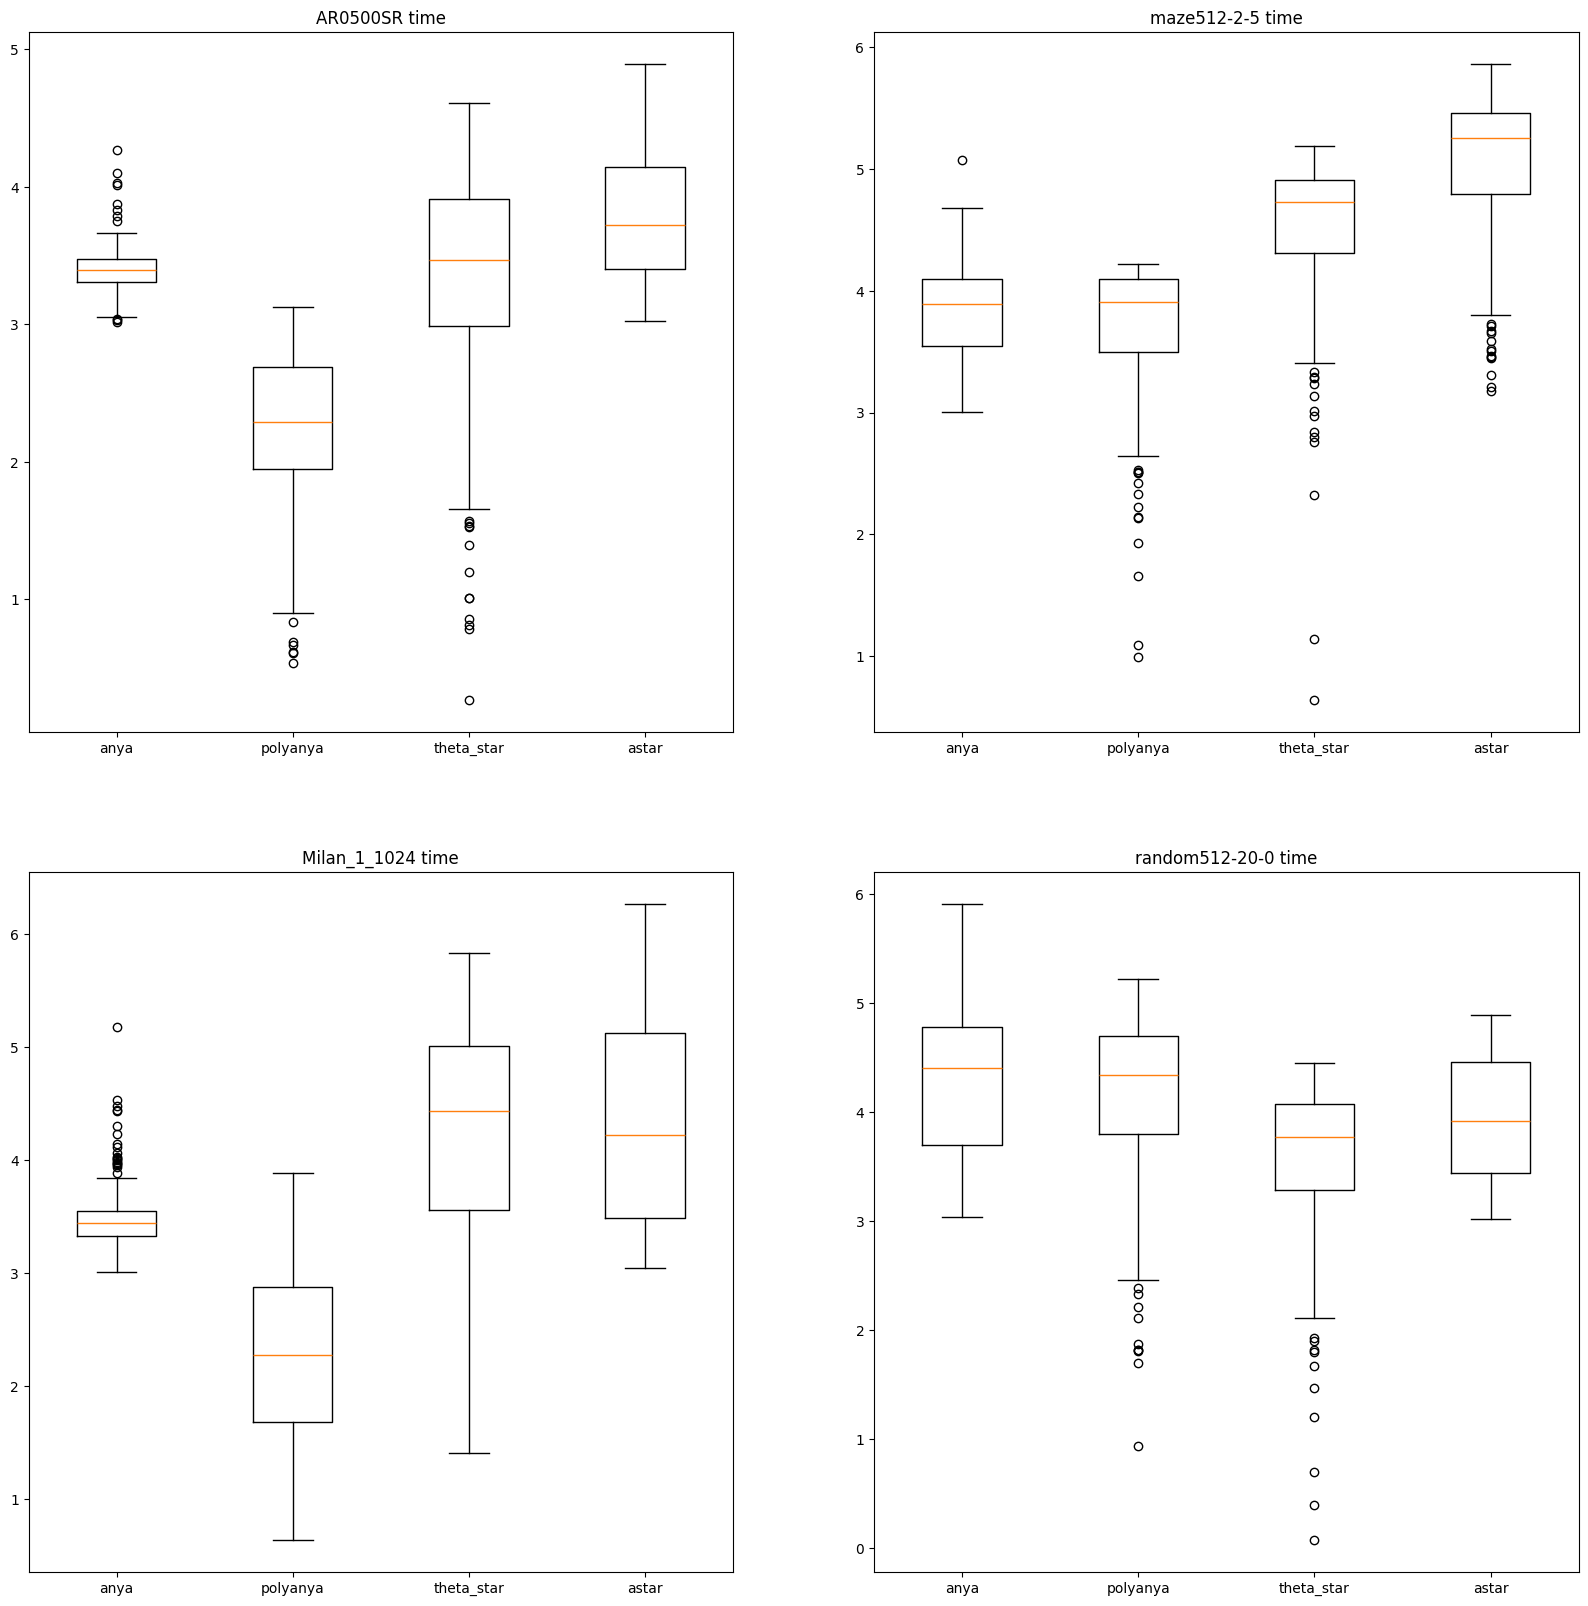

In [259]:
draw_boxplot('time', True)

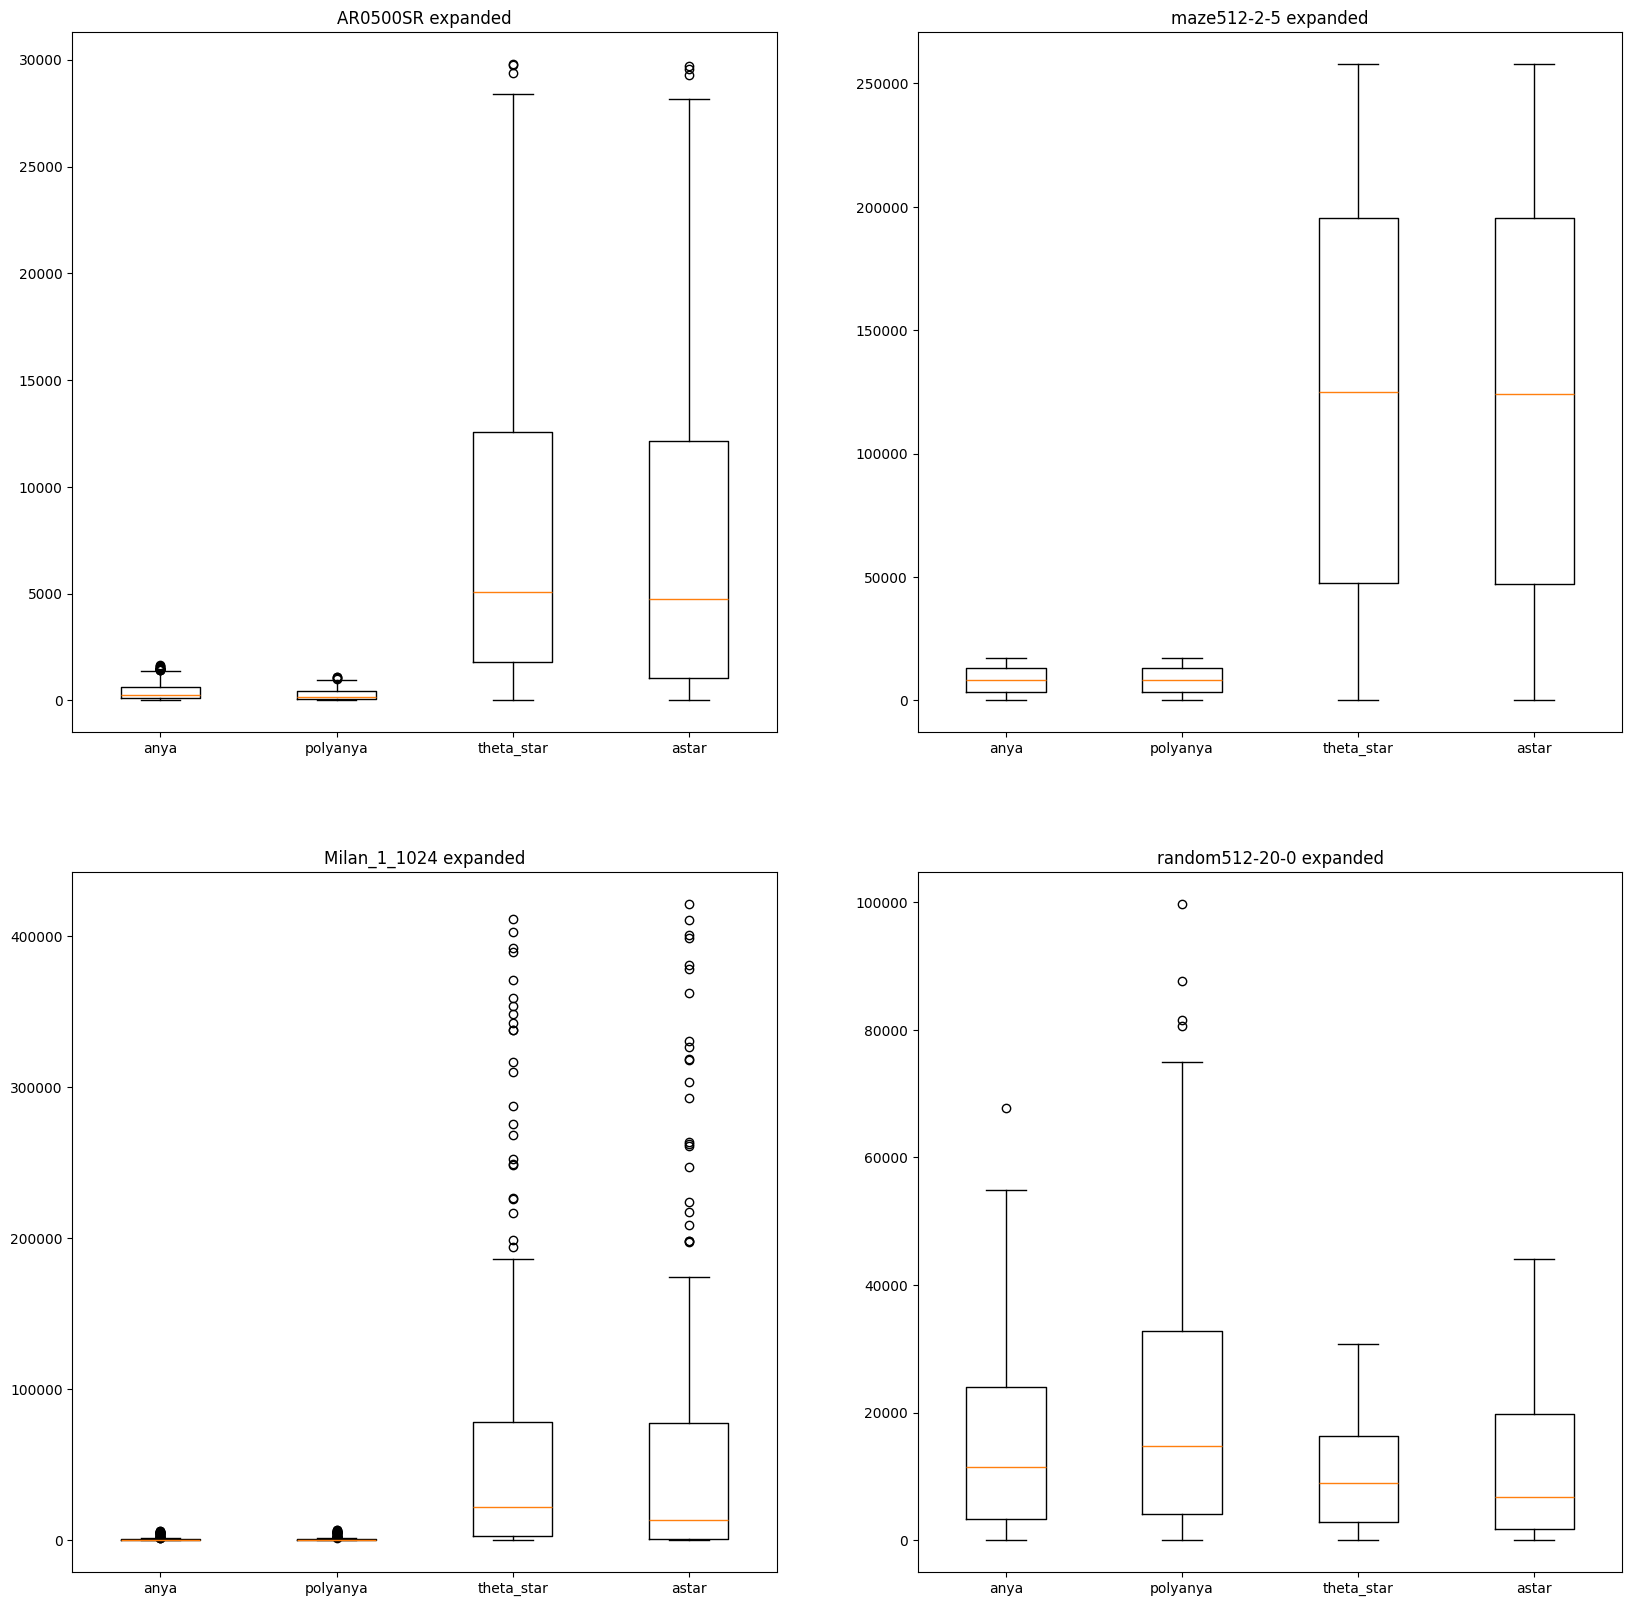

In [260]:
draw_boxplot('expanded', False)

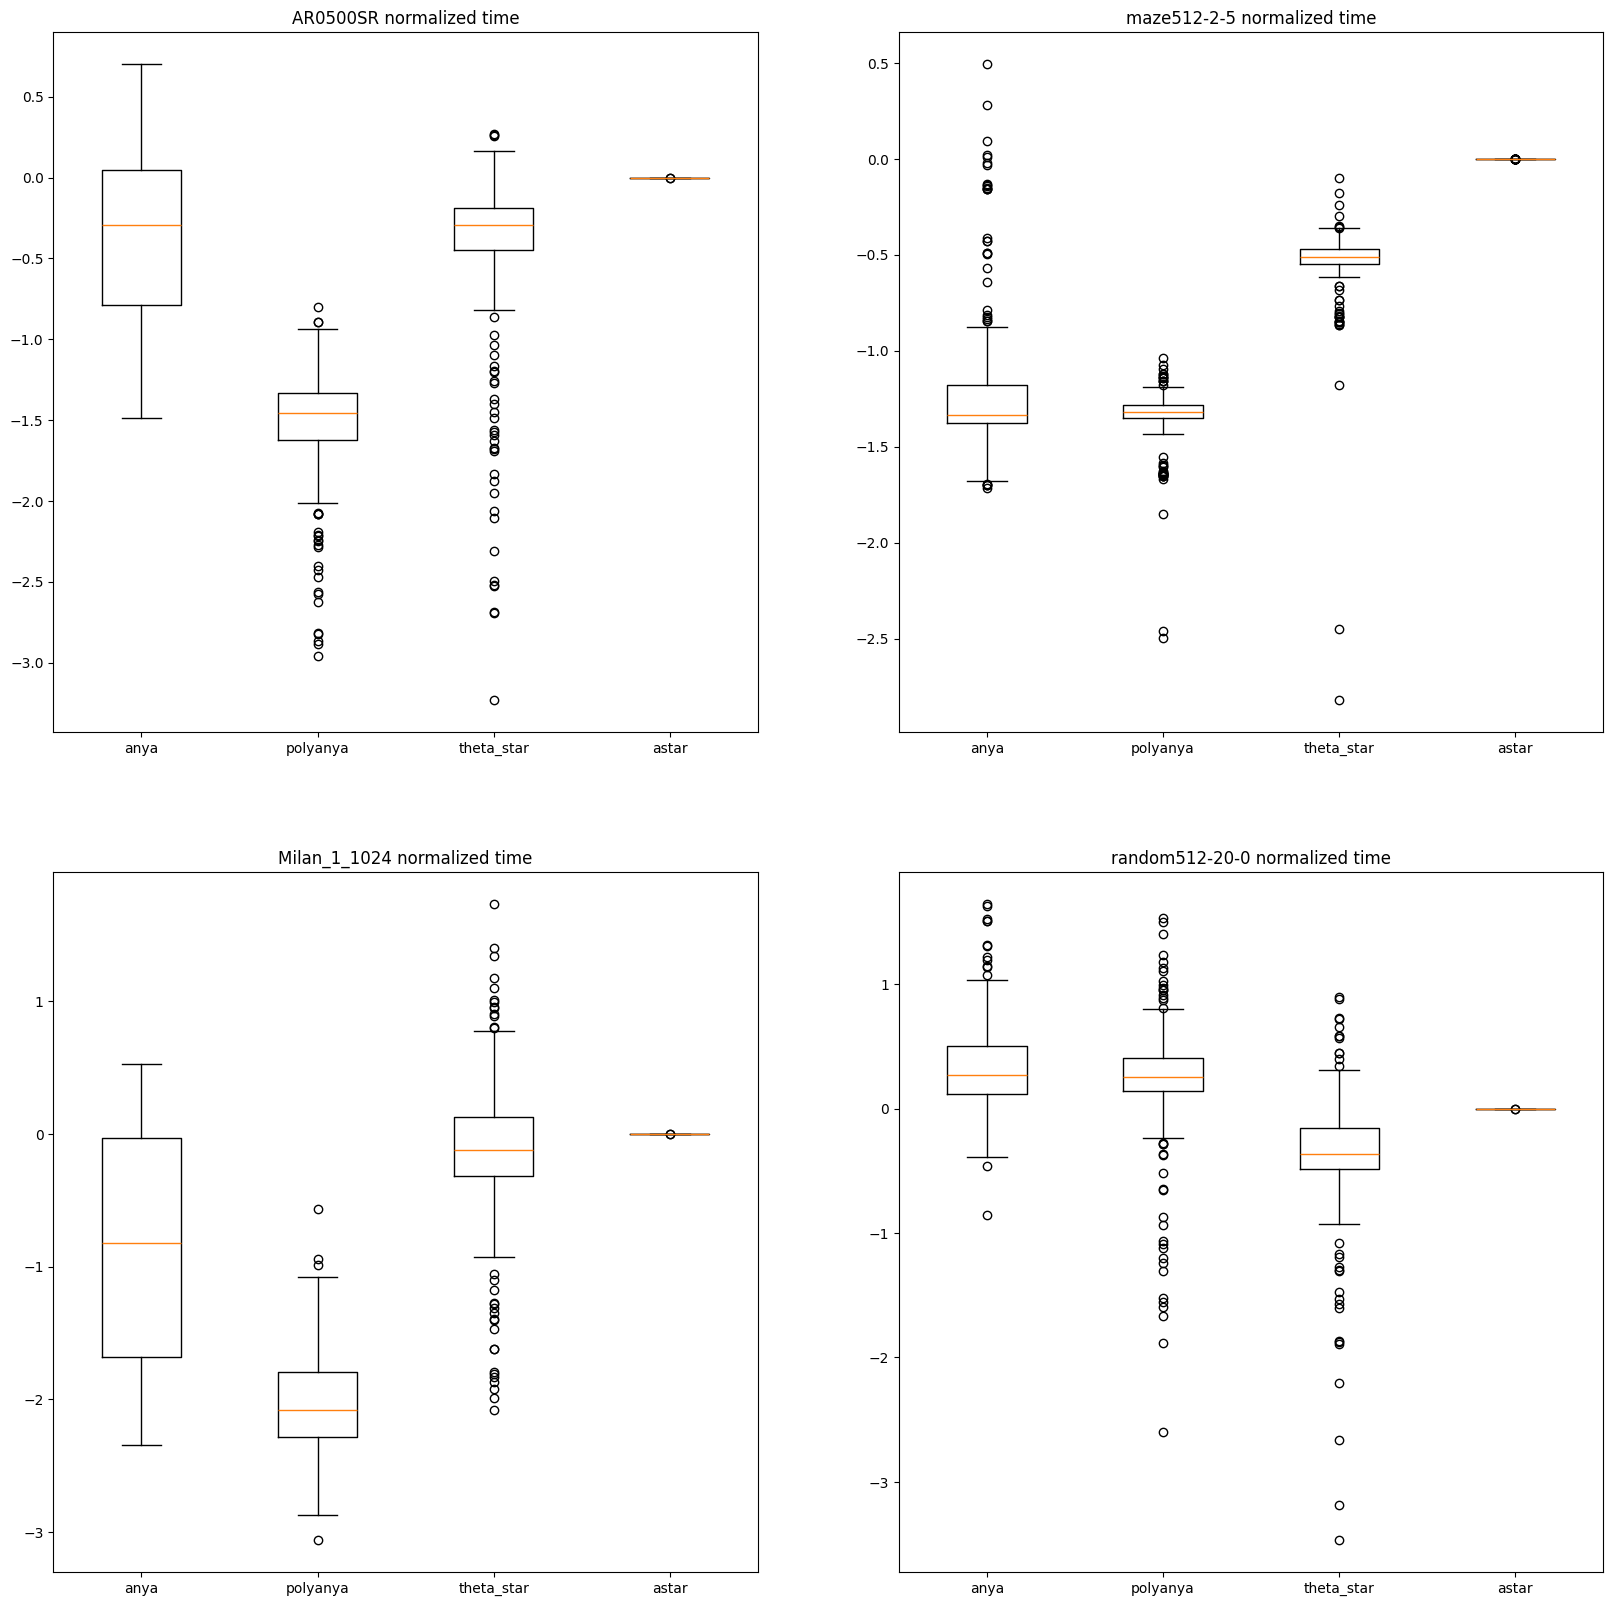

In [261]:
draw_boxplot('time', True, True)

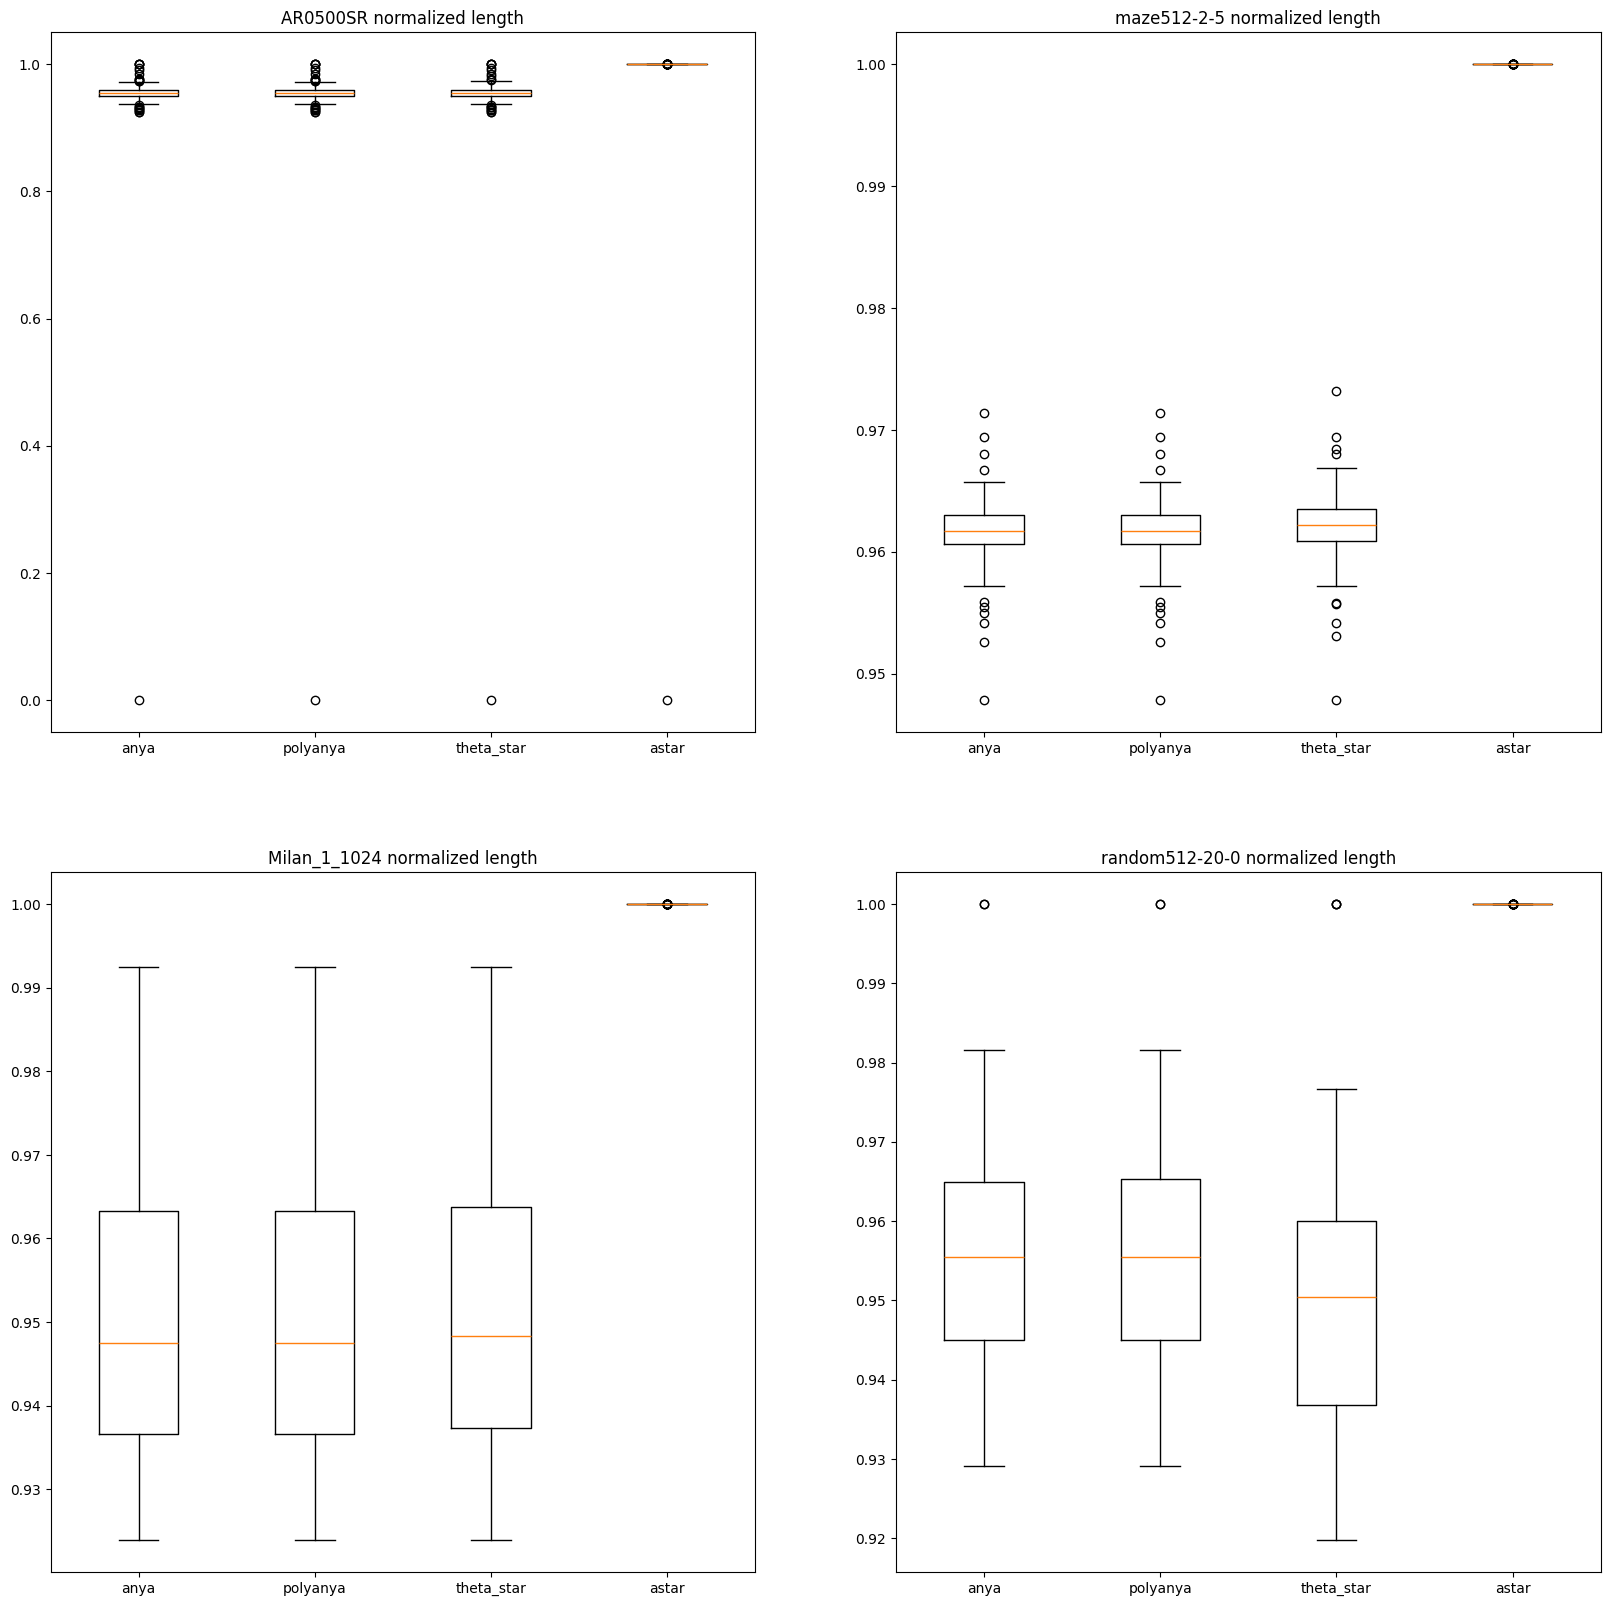

In [262]:
draw_boxplot('length', False, True)

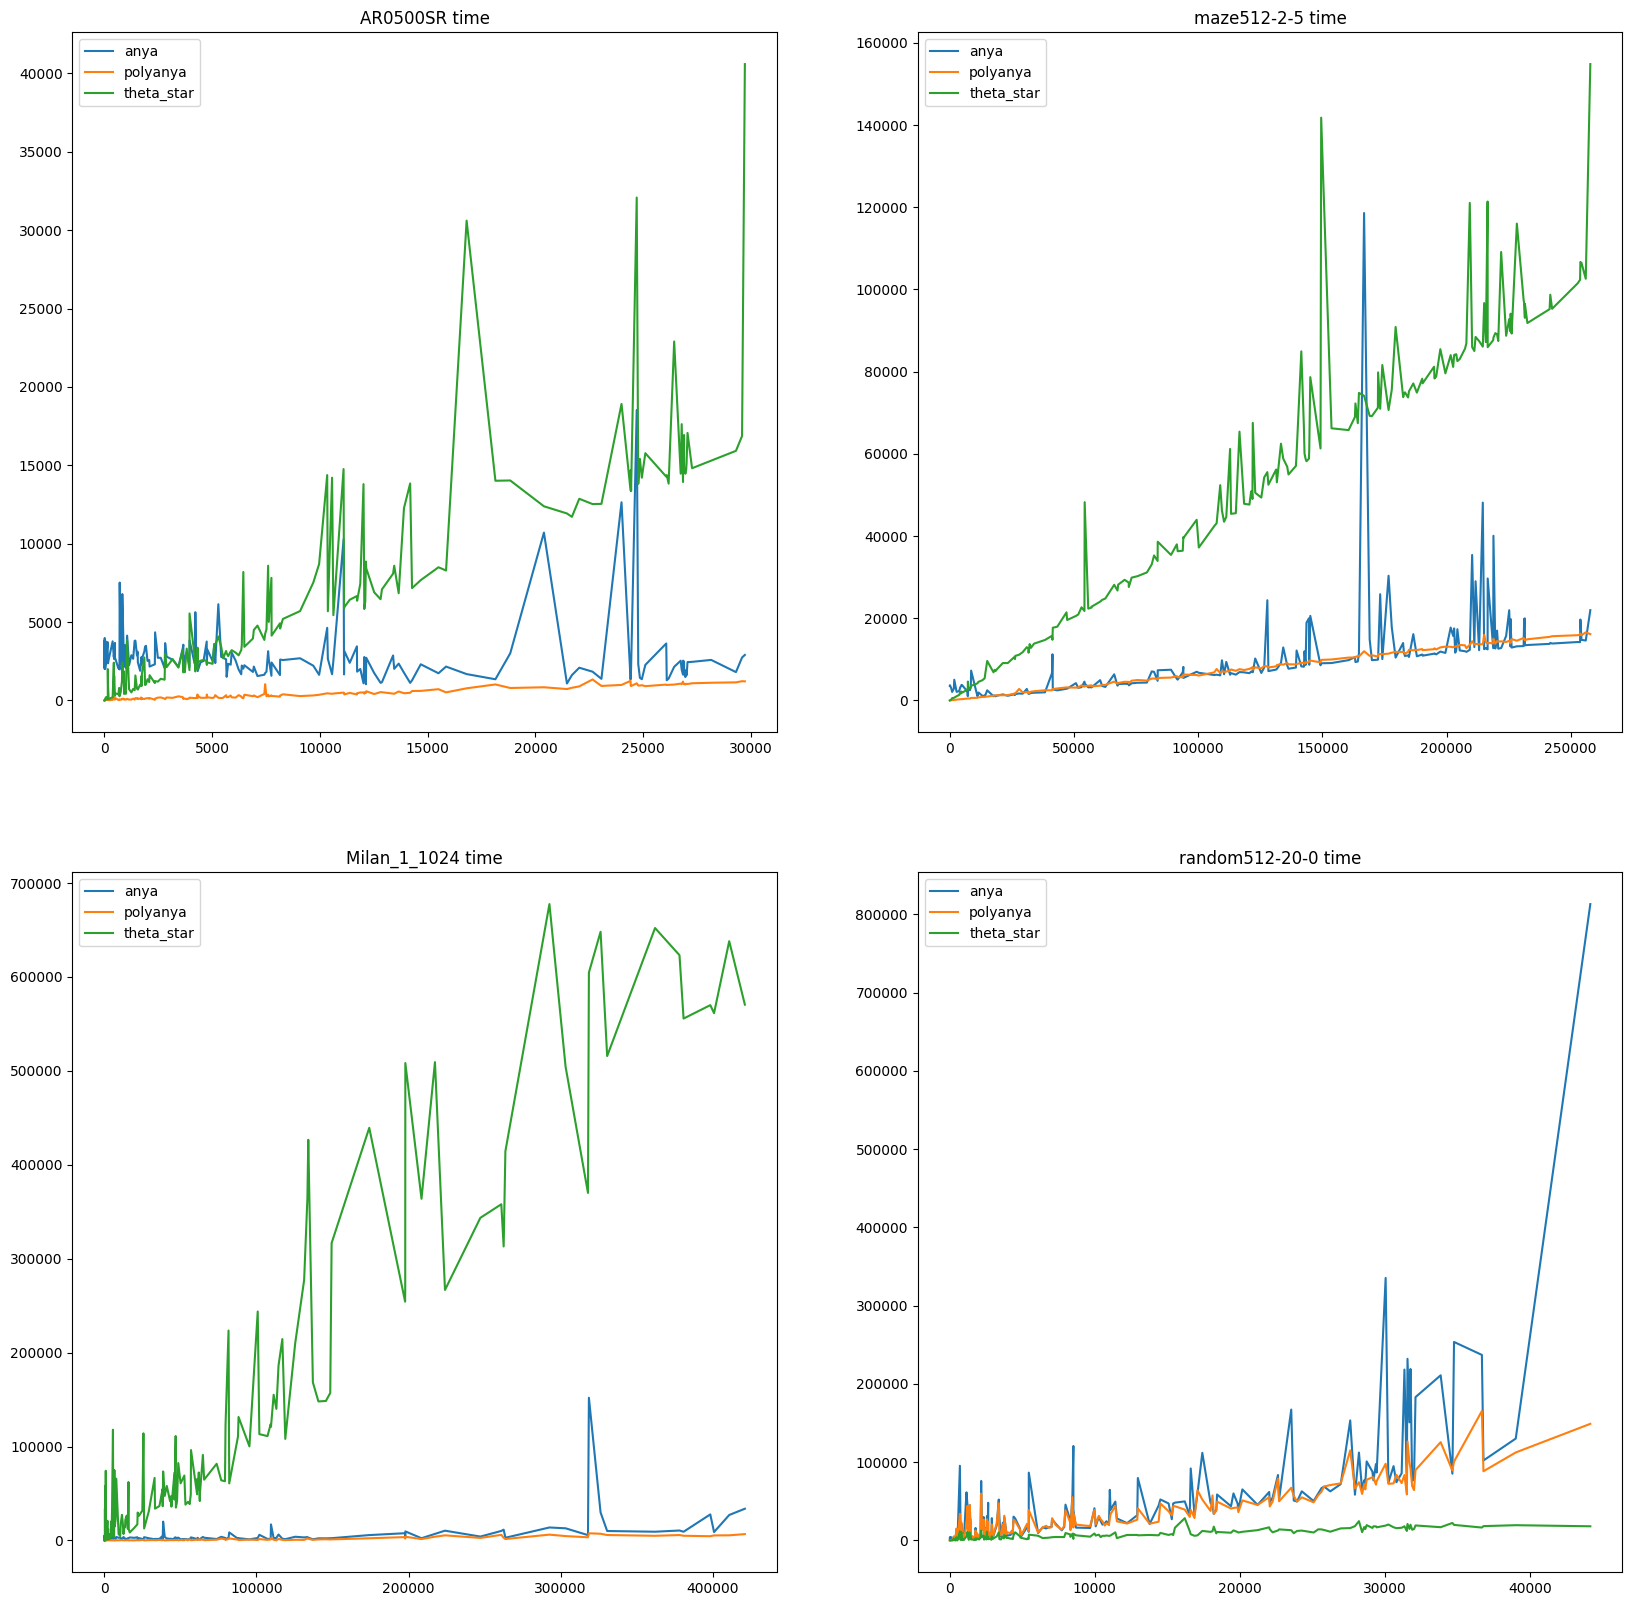

In [263]:
draw_line_plot('time', False)

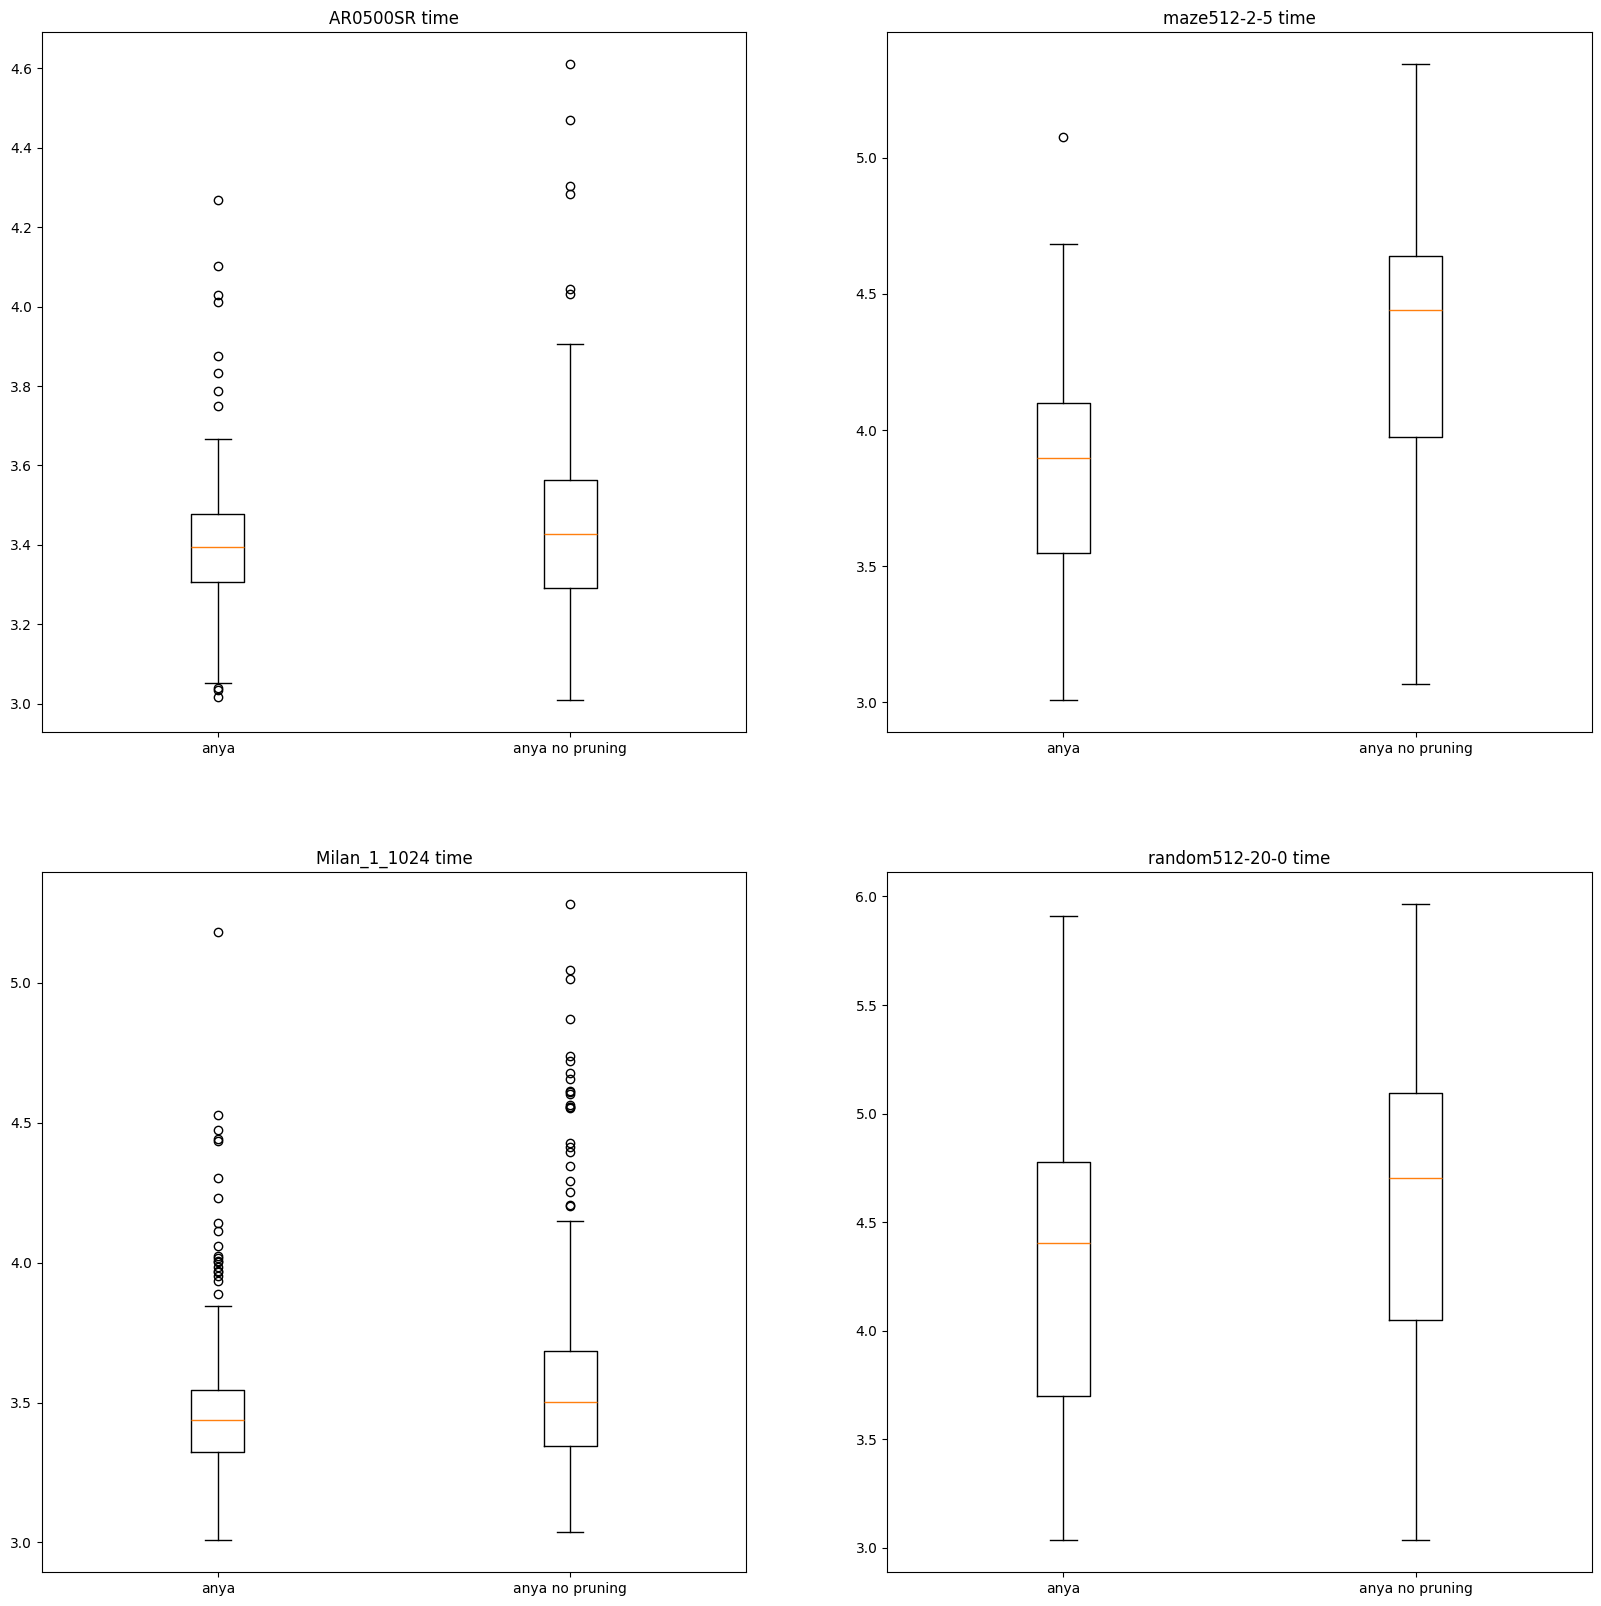

In [264]:
draw_alternative_anya_boxplot('time', True)

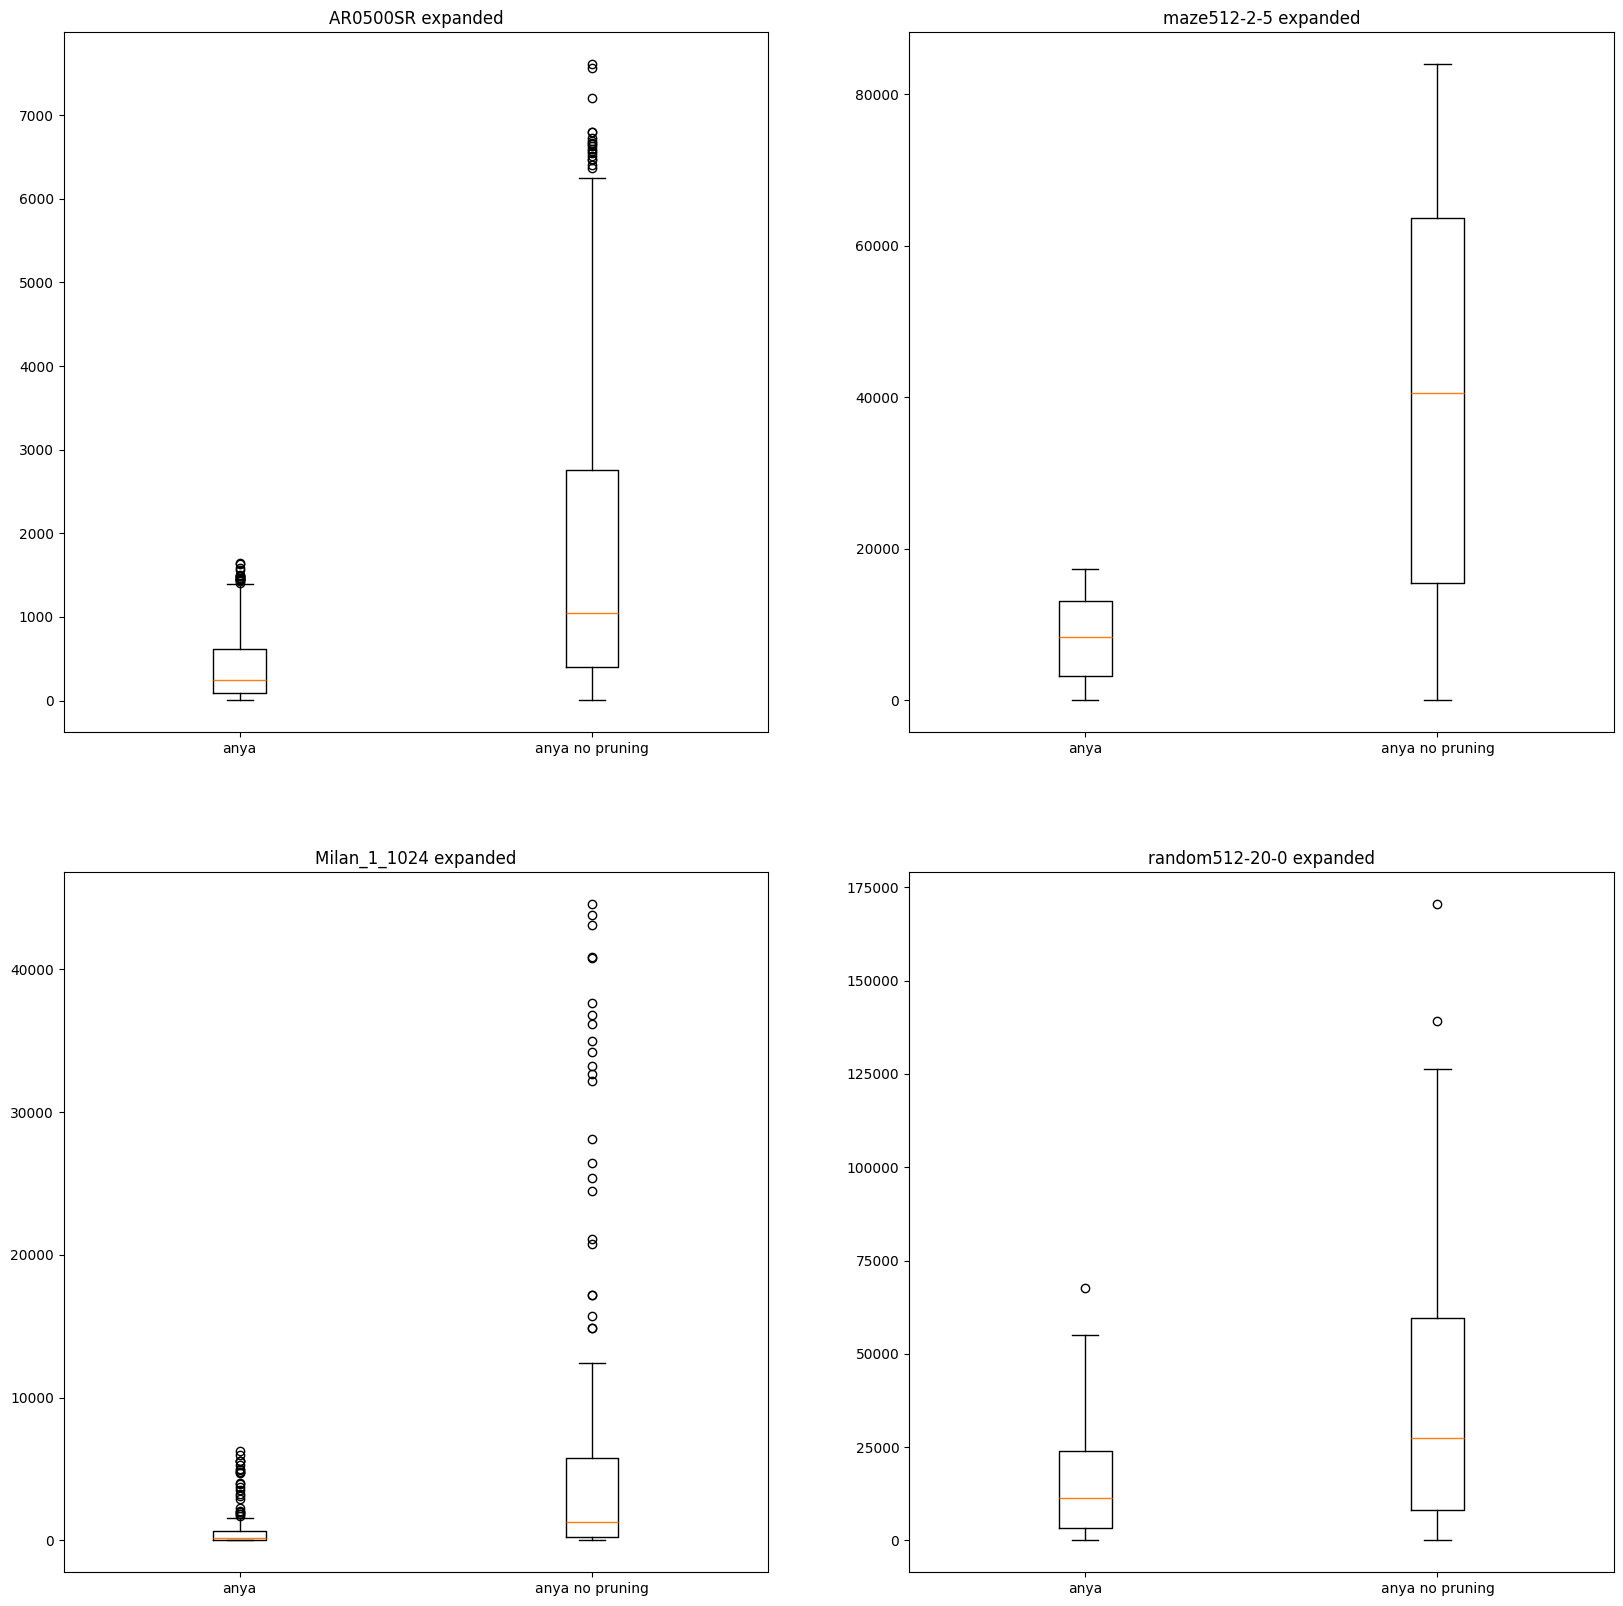

In [265]:
draw_alternative_anya_boxplot('expanded', False)

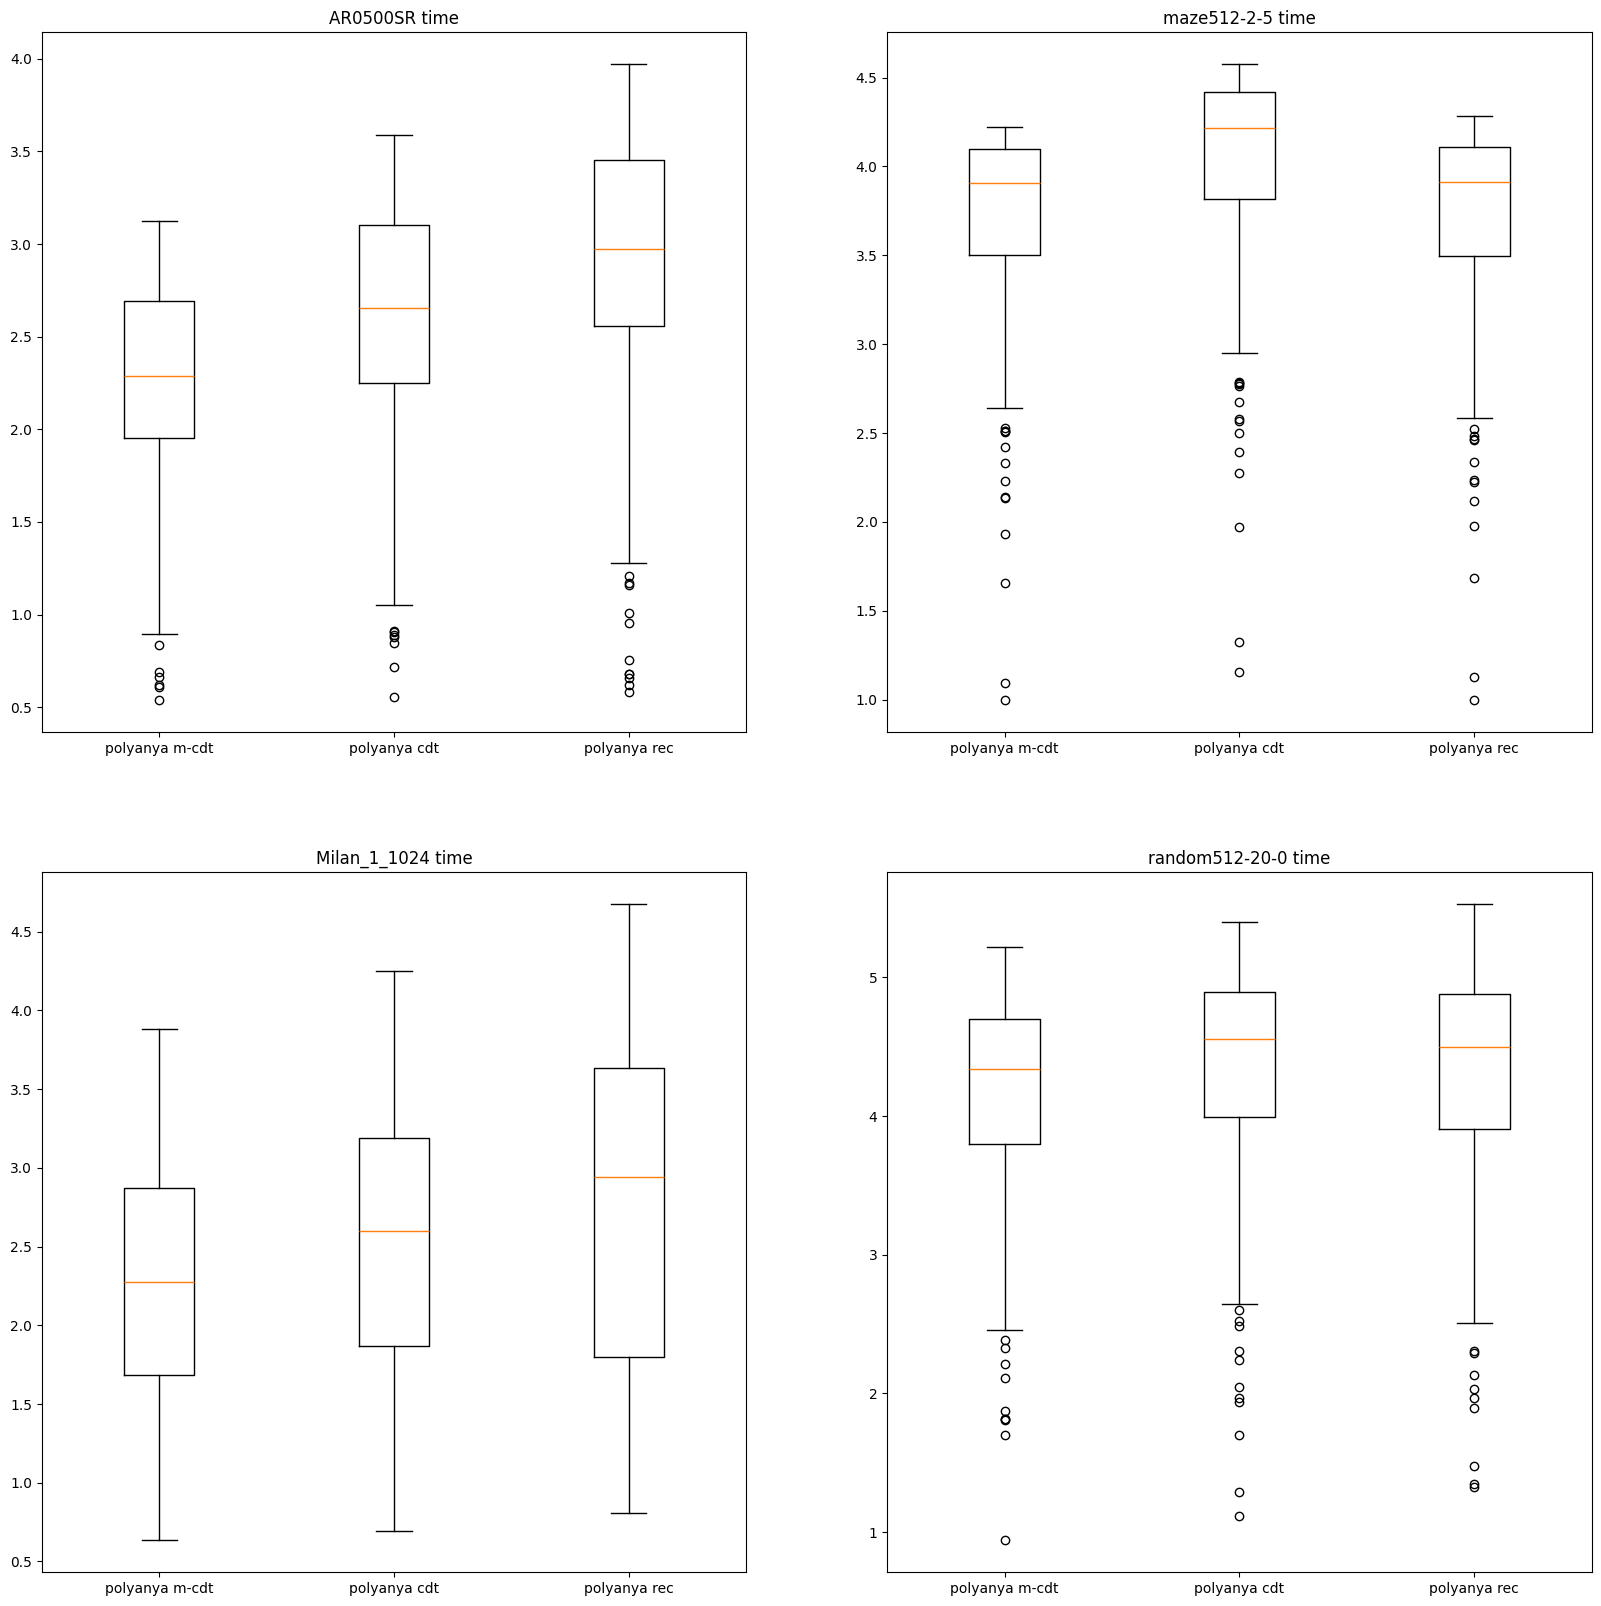

In [266]:
draw_alternative_polyanya_boxplot('time', True)

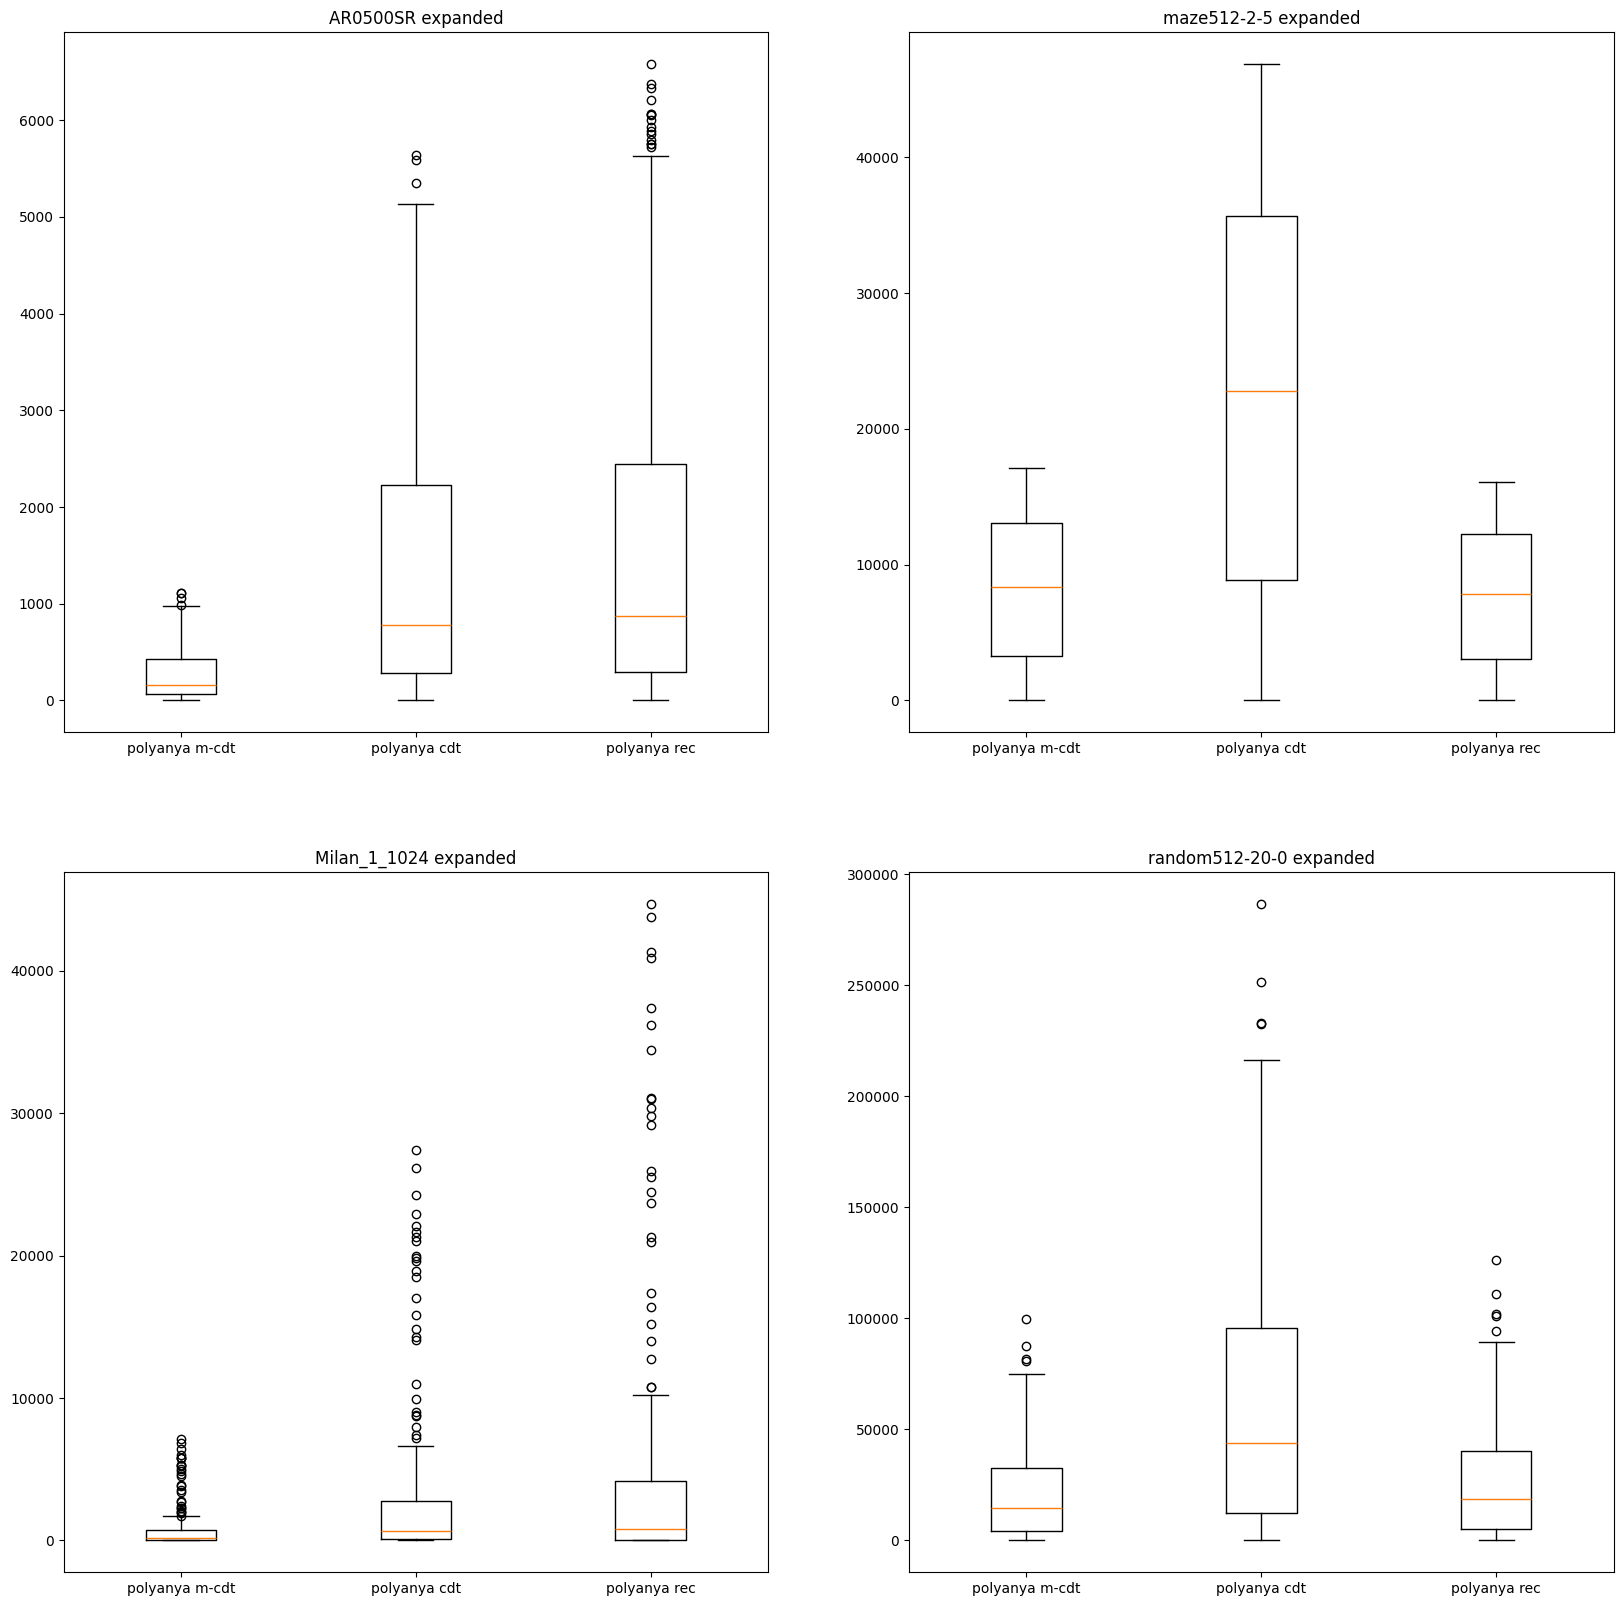

In [268]:
draw_alternative_polyanya_boxplot('expanded', False)